In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 读取数据
data = np.loadtxt('data1.txt', delimiter=',')
X = data[:, :-1]  # 特征
y = data[:, -1]   # 目标值
display(X, y)

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00],
       [1.985e+03, 4.000e+00],
       [1.534e+03, 3.000e+00],
       [1.427e+03, 3.000e+00],
       [1.380e+03, 3.000e+00],
       [1.494e+03, 3.000e+00],
       [1.940e+03, 4.000e+00],
       [2.000e+03, 3.000e+00],
       [1.890e+03, 3.000e+00],
       [4.478e+03, 5.000e+00],
       [1.268e+03, 3.000e+00],
       [2.300e+03, 4.000e+00],
       [1.320e+03, 2.000e+00],
       [1.236e+03, 3.000e+00],
       [2.609e+03, 4.000e+00],
       [3.031e+03, 4.000e+00],
       [1.767e+03, 3.000e+00],
       [1.888e+03, 2.000e+00],
       [1.604e+03, 3.000e+00],
       [1.962e+03, 4.000e+00],
       [3.890e+03, 3.000e+00],
       [1.100e+03, 3.000e+00],
       [1.458e+03, 3.000e+00],
       [2.526e+03, 3.000e+00],
       [2.200e+03, 3.000e+00],
       [2.637e+03, 3.000e+00],
       [1.839e+03, 2.000e+00],
       [1.000e+03, 1.000e+00],
       [

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

#### 观察数据发现第一列数据大致是第二列的1000倍，必须进行归一化，不然第二列的影响太小


In [3]:
#归一化处理
def normalize_data(data_train, data_test):
    data_norm = data_train.copy()
    maximum = np.max(data_norm, axis=0, keepdims=True)
    minimun = np.min(data_norm, axis=0, keepdims=True)
    data_train = (data_train - minimun)/(maximum - minimun)
    data_test = (data_test-minimun)/(maximum-minimun)
    return data_train, data_test

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val = normalize_data(X_train, X_val)
#print(X_train, X_val)

#使用模型包验证结果是否一样
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train) # 训练
coef = model.coef_.reshape(-1)
intercept = model.intercept_
print(f'使用LinearRegreesion包计算斜率和截距分别为：{coef}和{intercept}')

"""
#三维散点图
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(900,600))
ax = Axes3D(fig)
ax.scatter(X_train[:,0].T,X_train[:,1].T, y_train) # 三维散点图
ax.view_init(elev=10, azim=-20) # 调整视角
"""

# 添加偏置项（截距项）
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
X_val = np.concatenate((X_val, np.ones((X_val.shape[0],1))), axis=1)

# 正规方程解
theta_normal = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# 梯度下降法
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    history = []  # 用于存储损失值的列表
    for i in range(num_iters):
        error = X.dot(theta) - y
        gradient = (1/m) * X.T.dot(error)
        theta -= alpha * gradient
        cost = ((X.dot(theta) - y) ** 2).mean()  # 计算均方误差
        history.append(cost)
    return theta, history

alpha = 0.01  # 学习率
num_iters = 100000  # 迭代次数
theta_gradient_descent, loss_history = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), alpha, num_iters)

# 验证模型
def mean_squared_error(X, y, theta):
    error = X.dot(theta) - y
    return np.mean(error**2)

mse_normal = mean_squared_error(X_val, y_val, theta_normal)
mse_gradient_descent = mean_squared_error(X_val, y_val, theta_gradient_descent)
print(f'正规方程斜率和截距是: {theta_normal}')


使用LinearRegreesion包计算斜率和截距分别为：[475450.31512396 -11300.90295233]和178490.23306045806
正规方程斜率和截距是: [475450.31512396 -11300.90295233 178490.23306046]


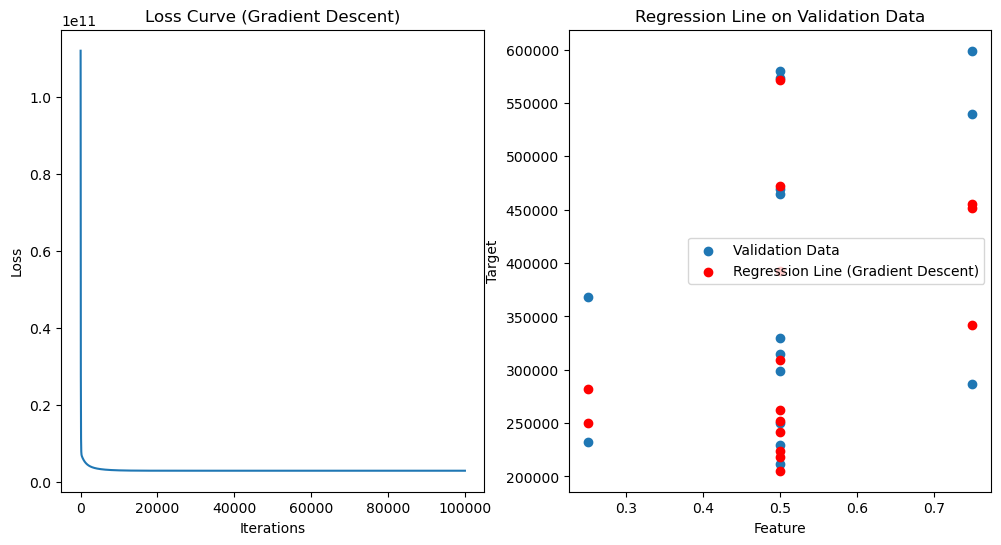

正规方程解的均方误差: 7611089615.0102
梯度下降法的均方误差: 7611090182.5280


In [4]:
# 可视化损失曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), loss_history, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve (Gradient Descent)')

# 可视化回归直线
plt.subplot(1, 2, 2)
plt.scatter(X_val[:, 1], y_val, label='Validation Data')
plt.scatter(X_val[:, 1], X_val.dot(theta_gradient_descent), color = 'red', label='Regression Line (Gradient Descent)')
#plt.plot(X_val[:, 1], X_val.dot(theta_gradient_descent), color='red', label='Regression Line (Gradient Descent)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Regression Line on Validation Data')

plt.show()

print("正规方程解的均方误差: {:.4f}".format(mse_normal))
print("梯度下降法的均方误差: {:.4f}".format(mse_gradient_descent))

Text(0.5, 1.0, 'Regression Line on Validation Data')

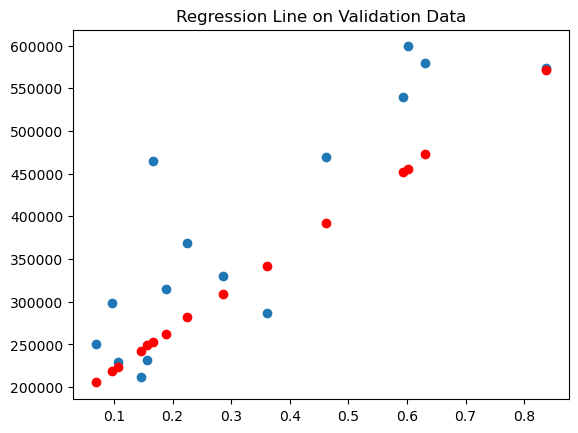

In [5]:
plt.scatter(X_val[:, 0], y_val, label='Validation Data')
plt.scatter(X_val[:, 0], X_val.dot(theta_gradient_descent), color = 'red', label='Regression Line (Gradient Descent)')
plt.title('Regression Line on Validation Data')